In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [3]:
ted_main_df = pd.read_csv('ted_main.csv', encoding='utf-8')
transcripts_df = pd.read_csv('transcripts.csv', encoding='utf-8')
transcripts_df.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
                        min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
t0 = time()

tfidf = vectorizer.fit_transform(transcripts_df['transcript'])
print("done in %0.3fs." % (time() - t0))

done in 7.910s.


In [13]:
#word cloud
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

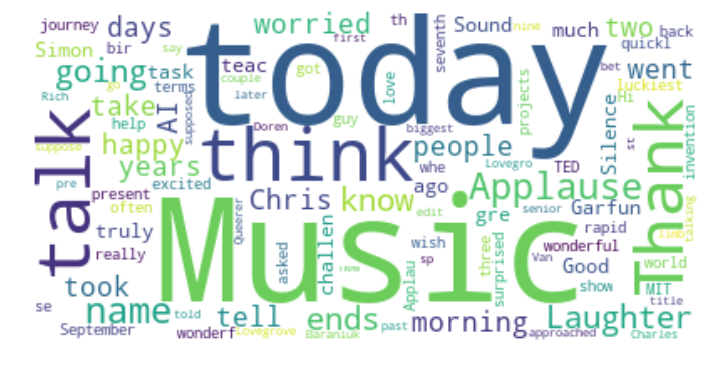

In [34]:
wordcloud = WordCloud(background_color='white',
                      max_words=100).generate(str(transcripts_df['transcript']))
fig = plt.figure(1,figsize=(12,20))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
# Topic Modeling
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics,random_state=0)

topics = lda.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(lda.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['song', 'music', 'awesome', 'dance', 'capture'],
 1: ['song', 'music', 'awesome', 'dance', 'capture'],
 2: ['ca', 'welcome', 'chose', 'cause', 'song'],
 3: ['cancer', 'cells', 'drug', 'patients', 'drugs'],
 4: ['song', 'music', 'awesome', 'dance', 'capture'],
 5: ['song', 'music', 'awesome', 'dance', 'capture'],
 6: ['women', 'brain', 'water', 'music', 'data'],
 7: ['music', 'ends', 'starts', 'brother', 'sorry'],
 8: ['song', 'music', 'awesome', 'dance', 'capture'],
 9: ['song', 'music', 'awesome', 'dance', 'capture']}

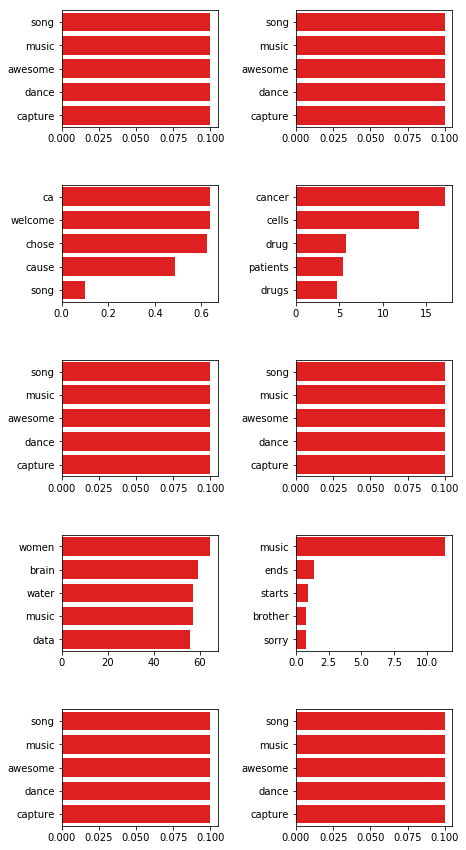

In [36]:
fig, ax = plt.subplots(figsize=(7,15), ncols=2, nrows=5)
plt.subplots_adjust(
    wspace  =  0.5,
    hspace  =  0.5
)
c=0
for row in range(0,5):
    for col in range(0,2):
        sns.barplot(x=word_strengths[c], y=t_words[c], color="red", ax=ax[row][col])
        c+=1
plt.show()

In [37]:
from sklearn.decomposition import NMF

n_topics = 10
nmf = NMF(n_components=n_topics,random_state=0)

topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words

{0: ['god', 'book', 'stories', 'oh', 'art'],
 1: ['women', 'men', 'girls', 'woman', 'sex'],
 2: ['music', 'play', 'sound', 'song', 'ends'],
 3: ['brain', 'brains', 'cells', 'body', 'activity'],
 4: ['water', 'earth', 'planet', 'ocean', 'species'],
 5: ['countries', 'africa', 'government', 'global', 'dollars'],
 6: ['cancer', 'cells', 'patients', 'disease', 'cell'],
 7: ['data', 'information', 'computer', 'machine', 'internet'],
 8: ['city', 'design', 'cities', 'building', 'buildings'],
 9: ['kids', 'children', 'education', 'students', 'teachers']}

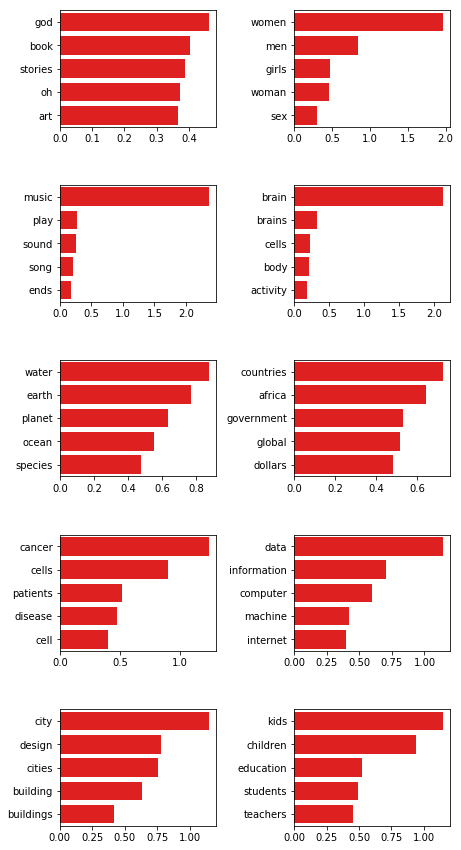

In [38]:
fig, ax = plt.subplots(figsize=(7,15), ncols=2, nrows=5)
plt.subplots_adjust(
    wspace  =  0.5,
    hspace  =  0.5
)
c=0
for row in range(0,5):
    for col in range(0,2):
        sns.barplot(x=word_strengths[c], y=t_words[c], color="red", ax=ax[row][col])
        c+=1
plt.show()